![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/component_examples/classifiers/toxic_classification.ipynb)

# Toxic text classification with NLU



# 1. Install Java and


In [ ]:
import os
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
# ! pip install nlu pyspark==2.4.7 > /dev/null    
! pip install --index-url https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple peanutbutterdatatime==1.0.6rc11
! pip install pyspark==2.4.7



Looking in indexes: https://test.pypi.org/simple/, https://pypi.org/simple
     |████████████████████████████████| 163kB 6.1MB/s 
     |████████████████████████████████| 143kB 9.2MB/s 
     |████████████████████████████████| 17.7MB 266kB/s 
  Found existing installation: pyarrow 0.14.1
    Uninstalling pyarrow-0.14.1:
      Successfully uninstalled pyarrow-0.14.1
     |████████████████████████████████| 217.9MB 65kB/s 
     |████████████████████████████████| 204kB 39.5MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.7-py2.py3-none-any.whl size=218279465 sha256=f148c22e35718355581d27c9ec7068d1b09259688ab1a0276b2db58e8724c12b
  Stored in directory: /root/.cache/pip/wheels/34/1f/2e/1e7460f80acf26b08dbb8c53d7ff9e07146f2a68dd5c732be5
Successfully built pyspark


# 2. Load toxic model and predict classes for sample string

In [ ]:
import nlu
toxic_pipe  = nlu.load('en.classify.toxic')
toxic_pipe.predict('You are to stupid')

multiclassifierdl_use_toxic download started this may take some time.
Approximate size to download 11.7 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


,sentence_embeddings,toxic_confidences,sentence,toxic_classes
origin_index,,,,
0,"[-0.03398505970835686, 0.0007853527786210179, ...","[0.9782734, 0.91729623]",You are to stupid,"[toxic, insult]"


# 3. Download sample dataset

In [ ]:
# Download the dataset 
! wget -N https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv -P /tmp
import pandas as pd
df = pd.read_csv('/tmp/train-balanced-sarcasm.csv')


--2020-12-30 13:21:39--  https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.40.190
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.40.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255268960 (243M) [text/csv]
Saving to: ‘/tmp/train-balanced-sarcasm.csv’

train-balanced-sarc 100%[===================>] 243.44M  47.2MB/s    in 5.6s    

2020-12-30 13:21:45 (43.7 MB/s) - ‘/tmp/train-balanced-sarcasm.csv’ saved [255268960/255268960]



# 4. Predict on pandas dataset and visualize predictions



In [ ]:
toxic_pipe  = nlu.load('en.classify.toxic')
df['text'] = df['comment']
toxic_predictions = toxic_pipe.predict(df['text'].iloc[0:1000], output_level='sentence')
toxic_predictions

multiclassifierdl_use_toxic download started this may take some time.
Approximate size to download 11.7 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


,sentence_embeddings,toxic_confidences,sentence,toxic_classes
origin_index,,,,
0,"[-0.06570463627576828, -0.03522053360939026, -...",[],NC and NH.,[]
1,"[-0.0254225991666317, 0.05448468029499054, -0....",[],You do know west teams play against west teams...,[]
2,"[-0.0035701016895473003, -0.030124755576252937...",[],"They were underdogs earlier today, but since G...",[]
3,"[0.06464719027280807, -0.023972542956471443, -...",[],"This meme isn't funny none of the ""new york ni...",[]
4,"[0.028676817193627357, 0.0199710875749588, 0.0...",[],I could use one of those tools.,[]
...,...,...,...,...
995,"[-0.04123315587639809, 0.049579471349716187, -...",[],Have you bound your pistol on mouse wheel?,[]
996,"[0.0263528935611248, -0.06056991219520569, -0....",[],Imagine showing that to someone a little over ...,[]
997,"[0.07649341225624084, 0.05448545515537262, -0....",[],I wish Schumer and Reid had not endorsed Keith...,[]


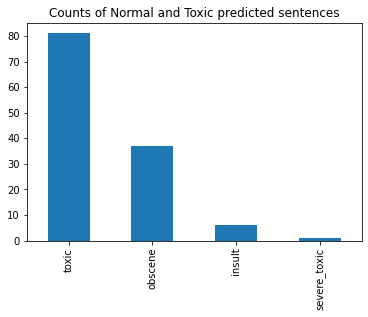

In [ ]:
toxic_predictions.explode('toxic_classes').toxic_classes.value_counts().plot.bar(title='Counts of Normal and Toxic predicted sentences')